### Lesson 2
1. Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). Сделать выводы об адекватности этих статистик.
2. Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. Сделать выводы по каждому признаку.
3. Используя выводы из двух предыдущих заданий, найдите те наблюдения, где есть пропуски, выбросы (неадекватные значения признака, которые отличаются от большинства), используя фильтрацию из pandas.

In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


### Задание 1

In [23]:
train.agg(['max','min', 'mean'])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
max,16798.0000,209.0000,19.0000,641.065193,7480.592129,2014.0000,42.0000,117.0000,2.005201e+07,0.521867,B,B,74.000,19083.0000,141.0000,4849.00000,6.0000,23.0000,B,633233.466570
min,0.0000,0.0000,0.0000,1.136859,0.370619,0.0000,1.0000,0.0000,1.910000e+03,0.000000,A,A,0.000,168.0000,0.0000,0.00000,0.0000,0.0000,A,59174.778028
mean,8383.4077,50.4008,1.8905,56.315775,37.199645,6.2733,8.5267,12.6094,3.990166e+03,0.118858,NaN,NaN,24.687,5352.1574,8.0392,1142.90446,1.3195,4.2313,NaN,214138.857399


In [49]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Во всех показателях есть не адекватные данные.
К примеру:
min Rooms = 0
max Rooms = 19
min Square = 1.136859 и тд
Это те данные которые не реальны или практически не реальны, которые необходимо исключить из статистики или исправить

### Задание 2

Посмотрим примерные данные на cian.ru
Есть 1 студии с плозадью 19.8 (жилая 9,4 кухня 5,1) по этому нужно исходить приблизительно из таких же данные

In [189]:
train['Rooms'].value_counts().sort_index()

0.0        8
1.0     3705
2.0     3880
3.0     2235
4.0      150
5.0       18
6.0        1
10.0       2
19.0       1
Name: Rooms, dtype: int64

Низкий шанс, что будет больше 5 комнат, по этому по колонке Rooms имеем 12 некорректных значений, что не так уж и плохо. 0,6,7,8

In [215]:
  train['Square'].value_counts().sort_index()

163.495333    1
167.767027    1
168.086347    1
169.117203    1
169.385184    1
169.509941    1
170.016872    1
170.379494    1
174.649522    1
183.382273    1
185.906396    1
186.692602    1
190.857689    1
198.930182    1
200.334539    1
212.932361    1
275.645284    1
409.425181    1
604.705972    1
641.065193    1
Name: Square, dtype: int64

Некорректные значения меньше 16.117154, максимальное значение 641.065193 предлагаю его оставить тк и реальные квартиры попадаются с такой площадью

In [236]:
train['LifeSquare'].value_counts().sort_index()

0.370619       1
0.641822       1
0.795539       1
0.873147       1
1.049867       1
              ..
263.542020     1
410.639749     1
461.463614     1
638.163193     1
7480.592129    1
Name: LifeSquare, Length: 7887, dtype: int64

Некорректные значения больше 461.463614 и меньше 10.523868

In [237]:
train['KitchenSquare'].value_counts().sort_index()

0.0        697
1.0       2460
2.0          4
3.0         22
4.0         39
5.0       1169
6.0       1038
7.0        609
8.0       1306
9.0        843
10.0      1075
11.0       233
12.0       249
13.0        67
14.0        51
15.0        31
16.0        16
17.0        12
18.0         6
19.0        11
20.0        14
21.0         1
22.0         3
23.0         1
25.0         2
26.0         1
27.0         1
29.0         1
30.0         2
31.0         1
32.0         2
35.0         1
36.0         1
37.0         2
39.0         1
40.0         1
41.0         2
42.0         1
43.0         2
48.0         1
51.0         2
53.0         1
54.0         1
58.0         2
60.0         1
62.0         1
63.0         1
66.0         1
72.0         1
73.0         1
75.0         1
78.0         1
84.0         1
96.0         1
112.0        2
123.0        1
1970.0       1
2014.0       1
Name: KitchenSquare, dtype: int64

Некорректные значения больше 123.0 и меньше 4.0

In [238]:
train['Floor'].value_counts().sort_index()

1     235
2     588
3     872
4     949
5     876
6     802
7     759
8     643
9     604
10    553
11    457
12    438
13    398
14    362
15    287
16    290
17    256
18    185
19    121
20     68
21     59
22     54
23     25
24     53
25     34
26     18
27      5
28      3
31      1
32      2
33      1
37      1
42      1
Name: Floor, dtype: int64

Тут достаточно тяжело сказать о корректности данных, как раз больше похоже на то, что данные по floor вполне корректны

In [239]:
train['HouseFloor'].value_counts().sort_index()

0.0       269
1.0       497
2.0        48
3.0       127
4.0       134
5.0      1031
6.0        58
7.0        59
8.0       141
9.0      1389
10.0      135
11.0       28
12.0     1074
13.0       27
14.0      625
15.0      123
16.0      576
17.0     2331
18.0       89
19.0      108
20.0      105
21.0       33
22.0      343
23.0       40
24.0      176
25.0      374
26.0        1
27.0        6
28.0        3
29.0        1
30.0       21
31.0        1
32.0        4
36.0        1
37.0        4
38.0        1
39.0        2
40.0        7
44.0        1
45.0        1
47.0        1
48.0        2
99.0        2
117.0       1
Name: HouseFloor, dtype: int64

Некорректные значения больше 48.0 и меньше 1.0 

In [240]:
train['HouseYear'].value_counts().sort_index()

1910          1
1912          2
1914          1
1916          1
1917          3
           ... 
2018        175
2019         79
2020         19
4968          1
20052011      1
Name: HouseYear, Length: 97, dtype: int64

Некорректные значения больше 2020

In [243]:
train['Ecology_1'].value_counts().sort_index()
train['Ecology_2'].value_counts().sort_index()
train['Ecology_3'].value_counts().sort_index()

A     275
B    9725
Name: Ecology_3, dtype: int64

по показателю Ecology_1,Ecology_2,Ecology_3 тяжело что то сказать

In [259]:
train['Social_1'].value_counts().sort_index()
train['Social_2'].value_counts().sort_index()
train['Social_3'].value_counts().sort_index()

0      2997
1      1861
2       635
3      1136
4       835
5       391
6       423
7       184
8       170
9       192
10      142
11      172
14       97
16      101
19       22
20       19
23       18
24       37
27       59
37        3
39       15
45        9
48       58
56       49
59       25
73       10
84       43
87       27
93       25
141     245
Name: Social_3, dtype: int64

по показателю Social_1,Social_2,Social_3 тяжело что то сказать

In [285]:
train['Healthcare_1'].value_counts().sort_index()
train['Helthcare_2'].value_counts().sort_index()
train['Shops_1'].value_counts().sort_index()
train['Shops_2'].value_counts().sort_index()

A     825
B    9175
Name: Shops_2, dtype: int64

По всем остальным показателям достаточно тяжело что либо сказать

### Задание 3

In [284]:
train.loc[(train['Rooms'].isin([0,6,7,8])) | (train['Square'] < 16.117154) | (train['Square'] > 641.065193) 
          | (train['LifeSquare'] < 10.523868) | (train['LifeSquare'] > 461.463614)
          | (train['KitchenSquare'] < 4.0) | (train['KitchenSquare'] > 123.0)
          | (train['HouseFloor'] < 1.0) | (train['HouseFloor'] > 48.0) | (train['HouseYear'] > 2020),]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945
18,4581,1,1.0,47.582480,NaN,1.0,16,16.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,128803.593810
19,367,45,1.0,42.367289,40.012529,1.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,647,1,2.0,63.324025,NaN,1.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,183809.327114
9990,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,B,B,47,8004,3,125.0,3,5,B,112411.221700
9991,11173,6,2.0,62.648779,NaN,0.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,264213.558631


### Lesson 4
1. Построить график распределения целевой переменной. Сделать выводы.
2. Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.
3. Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

### Задание 1
Построить график распределения целевой переменной. Сделать выводы.

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
Price = train["Price"]
Price_sort = Price.sort_values()
SPrice = Price_sort.reset_index()
SPrice

,index,Price
0,1319,59174.778028
1,1709,59877.592523
2,130,60502.583500
3,8191,60825.032060
4,8563,60828.260686
...,...,...
9995,8983,624680.099059
9996,9826,625678.644994
9997,7173,625820.041178
9998,2041,627525.072788


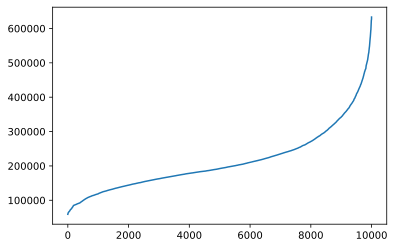

In [38]:
plt.plot(SPrice.Price)

По графику видно, что примерно от 1000 до 8500 стоимость квартир меняется не так сильно. Больше похоже на некоторую линейную зависимость. На примере квартир можно понять, что из 10000 данных примерно 75% стоимости квартир линейно зависит от их параметров.

### Задание 2
Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.

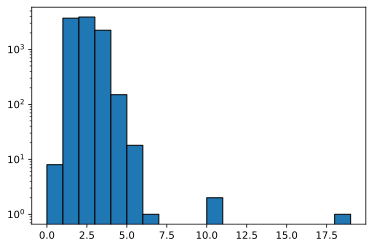

In [99]:
Rooms = train['Rooms'] # количество комнат
Rooms.describe
plt.hist(Rooms,bins=19, ec='black')
plt.yscale(value='log')
plt.show()

Вывод: большинство значений лежит в промежутке от 1 до 5 комнат, скорее всего есть некоторые уникальные 6 комнтаные квартиры, все остальные значения некорректны

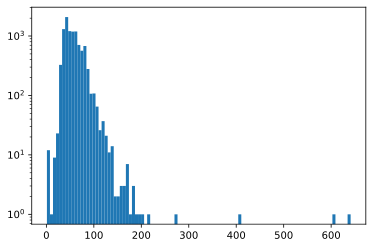

In [98]:
Square = train['Square'] # общая площадь
plt.hist(Square.sort_values(), 100)
plt.yscale(value='log')
plt.show()

Вывод: подавляющее большинство значений признаков находится в пределах 30-200 м2 .

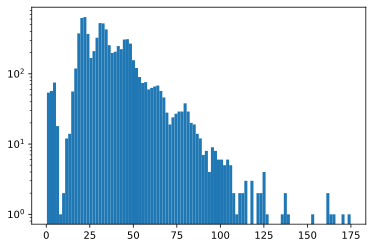

In [97]:
LifeSquare = train['LifeSquare'] # жилая площадь

plt.hist(LifeSquare[LifeSquare < 200], 100)
plt.yscale(value='log')
plt.show()

Вывод: есть выборы, если строить гистограмму без условий, более наглядно будет выглядеть при условии < 200

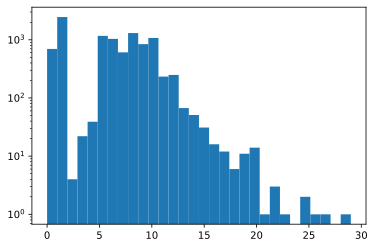

In [96]:
KitchenSquare = train['KitchenSquare'] # площадь кухни

plt.hist(KitchenSquare[KitchenSquare < 30], 30)
plt.yscale(value='log')
plt.show()

Вывод: есть выборы, если строить гистограмму без условий, более наглядно будет выглядеть при условии < 30, все остальное на гистограмме кажется аномальным или крайне редким. Но и то что меньше 3 так же крайне маловероятно, а так значений достаточно много. Площадь кухни в данных очень неоднозначный показатель.

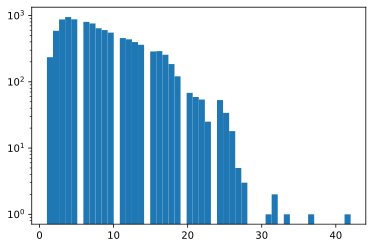

In [100]:
Floor = train['Floor'] # этаж
plt.hist(Floor, 50)
plt.yscale(value='log')
plt.show()

Вывод: если смотреть на распределение, то конечно очень странно выглядит то что больше 30, но вполне вероятны дома и большей этажности, но я бы выкинул из модели данные больше 30

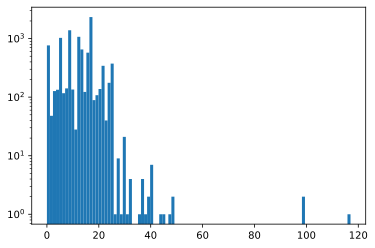

In [102]:
HouseFloor = train['HouseFloor'] # этажность дома
plt.hist(HouseFloor, 100)
plt.yscale(value='log')
plt.show()

Вывод: есть выбросы, я бы ограничивал выборку меньше 40, а дальше надо смотреть более детально

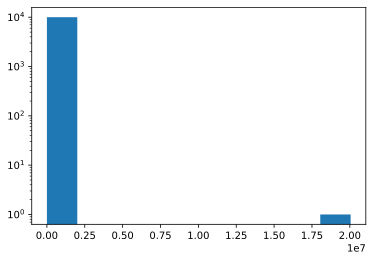

In [108]:
HouseYear = train['HouseYear'] # год постройки
plt.hist(HouseYear, 10)
plt.yscale(value='log')
plt.show()

Вывод: есть выброс

### Задание 3
Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

In [128]:
Corr = train[train.columns[1:]].corr()['Price']
Corr

DistrictId       0.265100
Rooms            0.550291
Square           0.520075
LifeSquare       0.081292
KitchenSquare    0.028864
Floor            0.128715
HouseFloor       0.088280
HouseYear        0.004305
Ecology_1       -0.058381
Social_1         0.263286
Social_2         0.239226
Social_3         0.074878
Healthcare_1     0.138755
Helthcare_2      0.253090
Shops_1          0.180876
Price            1.000000
Name: Price, dtype: float64

Вывод : Стоимость высоко коррелируется с параметрами: Количество комнат и Площадь. Что соответсвует действительности. Предобработка этих параметров должна производится в первую очередь

Вывод : Стоимость средне коррелируется с параметрами: Район, Социальные показатели 1 и 2, Показатели местности, связанные с охраной здоровья

Вывод: Набор параметров слабо влияет на стоимость дома. Признак жилая площадь - является роизводной от площадь, поэтому является вторичным. Признак площадь кухни - также является производным. количество этажей в доме - очевидно не влияет на цену и т.д. Возможно данные признаки можно исключить из модели.